# Customer Support Chatbot - Data Collection and Visualization

This notebook demonstrates how to collect customer support data from various sources, analyze it, and visualize the results.

## Setup

First, let's import the necessary libraries and modules.

In [2]:
# Standard libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Import our custom modules
from data_collector import DataCollector
from data_analyzer import DataAnalyzer

# Configure paths
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

## 1. Data Collection

Let's collect customer support data from various sources using our `DataCollector` class.

In [3]:
# Initialize the data collector
collector = DataCollector(data_dir=DATA_DIR)

# Collect data from all sources
print("Collecting data from all sources...")
data = collector.collect_all_data()
print(f"Collected {len(data)} records")

# Display the first few rows
display(data.head())

2025-03-13 13:31:03,420 - data_collector - INFO - DataCollector initialized with data directory: data
2025-03-13 13:31:03,421 - data_collector - INFO - Starting data collection from all sources
2025-03-13 13:31:03,422 - data_collector - INFO - Collecting Twitter customer support data
2025-03-13 13:31:03,435 - data_collector - INFO - Saved Twitter data to data\raw\twitter_data.csv (200 records)
2025-03-13 13:31:03,435 - data_collector - INFO - Collecting e-commerce FAQ data
2025-03-13 13:31:03,440 - data_collector - INFO - Saved e-commerce FAQ data to data\raw\ecommerce_faq_data.csv (150 records)
2025-03-13 13:31:03,441 - data_collector - INFO - Collecting product information data
2025-03-13 13:31:03,444 - data_collector - INFO - Saved product data to data\raw\product_data.csv (28 records)
2025-03-13 13:31:03,448 - data_collector - INFO - Saved combined data to data\raw\combined_data_20250313.csv


Collected 378 records


,question,answer,category,source,timestamp
0,I need a laptop with good battery life,Our DEF Ultrabook offers up to 15 hours of bat...,product_recommendation,twitter_customer_support,2025-03-13 13:31:03
1,Which laptop is better for video editing?,"For video editing, I'd recommend our GHI Pro w...",product_info,twitter_customer_support,2025-03-13 13:31:03
2,Làm thế nào để trả lại sản phẩm bị lỗi?,"Để trả lại sản phẩm bị lỗi, vui lòng chụp ảnh ...",returns,twitter_customer_support,2025-03-13 13:31:03
3,Is there a discount for first-time customers?,"Yes, new customers can use the code WELCOME10 ...",general,twitter_customer_support,2025-03-13 13:31:03
4,"My payment was declined, what should I do?",Payment declines can happen for various reason...,payment,twitter_customer_support,2025-03-13 13:31:03


Let's examine the data sources and categories.

In [4]:
# Count records by source
source_counts = data['source'].value_counts()
print("Records by source:")
display(source_counts)

# Count records by category
category_counts = data['category'].value_counts()
print("\nRecords by category:")
display(category_counts)

Records by source:


source
twitter_customer_support    200
ecommerce_faq               150
product_database             28
Name: count, dtype: int64


Records by category:


category
order_tracking            71
shipping                  69
product_info              57
returns                   47
product_recommendation    38
general                   38
payment                   34
account                   24
Name: count, dtype: int64

## 2. Data Analysis

Now, let's analyze the collected data using our `DataAnalyzer` class.

In [5]:
# Initialize the data analyzer
analyzer = DataAnalyzer(data_dir=DATA_DIR)

# Load the data
try:
    df = analyzer.load_data()
    print(f"Loaded {len(df)} records from file")
except FileNotFoundError:
    print("No saved data found, using the collected data")
    df = data

# Analyze the data
print("Analyzing data...")
df_analyzed = analyzer.analyze_data(df)
print(f"Analysis complete for {len(df_analyzed)} records")

# Display the analyzed data
display(df_analyzed.head())

2025-03-13 13:31:03,487 - data_analyzer - INFO - DataAnalyzer initialized with data directory: data
2025-03-13 13:31:03,489 - data_analyzer - INFO - Loading data from data\raw\combined_data_20250313.csv
2025-03-13 13:31:03,494 - data_analyzer - INFO - Loaded 378 records
2025-03-13 13:31:03,495 - data_analyzer - INFO - Starting data analysis
2025-03-13 13:31:03,496 - data_analyzer - INFO - Cleaning text
2025-03-13 13:31:03,515 - data_analyzer - INFO - Calculating text length
2025-03-13 13:31:03,518 - data_analyzer - INFO - Extracting entities
2025-03-13 13:31:03,530 - data_analyzer - INFO - Saved analyzed data to data\analyzed\analyzed_data_20250313.csv


Loaded 378 records from file
Analyzing data...
Analysis complete for 378 records


,question,answer,category,source,timestamp,question_clean,answer_clean,question_length,answer_length,entities
0,I need a laptop with good battery life,Our DEF Ultrabook offers up to 15 hours of bat...,product_recommendation,twitter_customer_support,2025-03-13 13:31:03,need laptop with good battery life,def ultrabook offers up hours battery life per...,8,20,[PRODUCT_TYPE:laptop]
1,Which laptop is better for video editing?,"For video editing, I'd recommend our GHI Pro w...",product_info,twitter_customer_support,2025-03-13 13:31:03,laptop better video editing,video editing id recommend ghi pro with core p...,7,18,[PRODUCT_TYPE:laptop]
2,Làm thế nào để trả lại sản phẩm bị lỗi?,"Để trả lại sản phẩm bị lỗi, vui lòng chụp ảnh ...",returns,twitter_customer_support,2025-03-13 13:31:03,làm thế nào trả lại sản phẩm bị lỗi,trả lại sản phẩm bị lỗi vui lòng chụp ảnh sản ...,10,32,[]
3,Is there a discount for first-time customers?,"Yes, new customers can use the code WELCOME10 ...",general,twitter_customer_support,2025-03-13 13:31:03,discount firsttime customers,yes new customers use code welcome first purchase,7,14,[]
4,"My payment was declined, what should I do?",Payment declines can happen for various reason...,payment,twitter_customer_support,2025-03-13 13:31:03,payment was declined do,payment declines happen various reasons please...,8,23,[]


Let's examine the text length distribution.

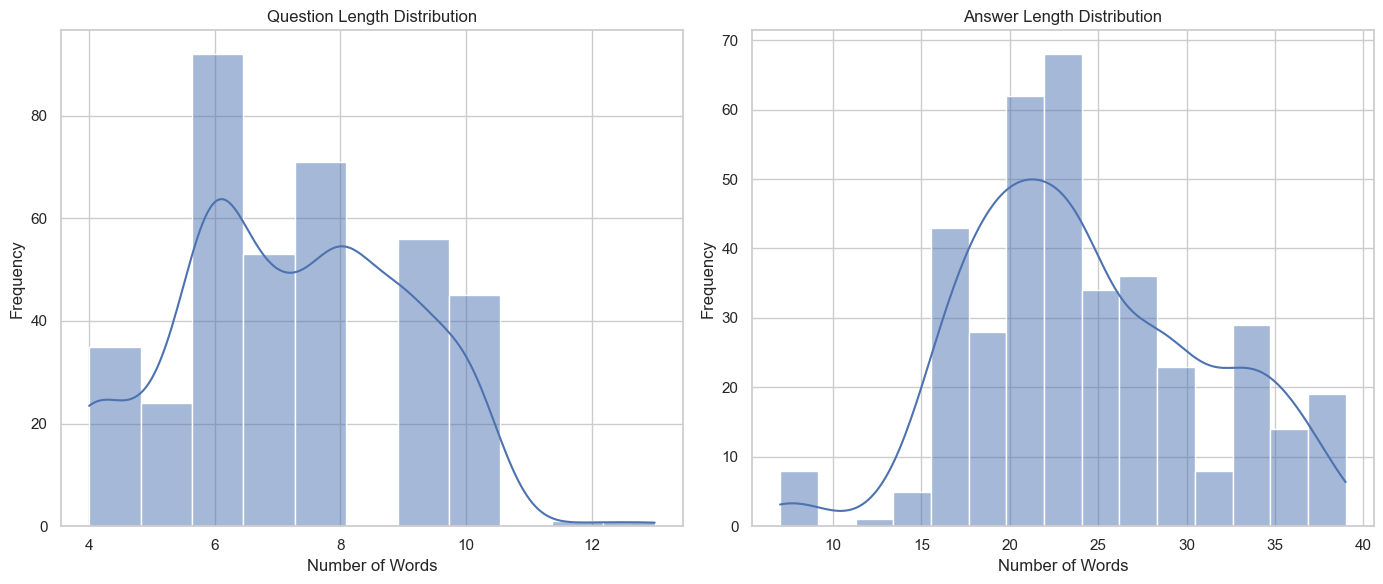

In [6]:
# Plot text length distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_analyzed['question_length'], kde=True)
plt.title('Question Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_analyzed['answer_length'], kde=True)
plt.title('Answer Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Data Visualization

Let's create visualizations to better understand the data.

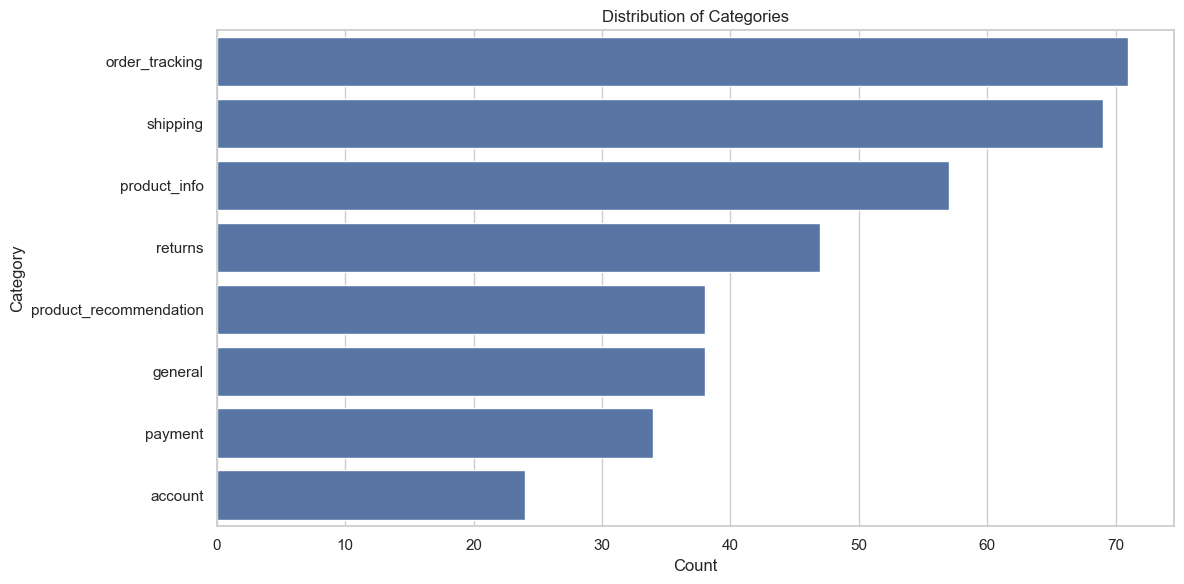

In [7]:
# Visualize category distribution
plt.figure(figsize=(12, 6))
category_counts = df_analyzed['category'].value_counts()

# Plot horizontal bar chart
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

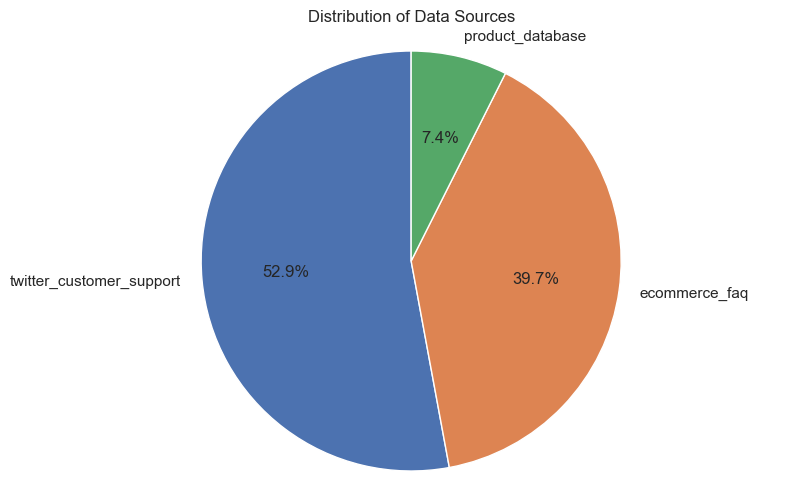

In [8]:
# Visualize source distribution
if 'source' in df_analyzed.columns:
    plt.figure(figsize=(10, 6))
    source_counts = df_analyzed['source'].value_counts()
    
    # Plot pie chart
    plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Distribution of Data Sources')
    plt.show()

Let's create word clouds for questions and answers.

In [9]:
try:
    from wordcloud import WordCloud
    
    # Word cloud for questions
    plt.figure(figsize=(12, 6))
    all_questions = ' '.join(df_analyzed['question_clean'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_questions)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Questions')
    plt.tight_layout()
    plt.show()
    
    # Word cloud for answers
    plt.figure(figsize=(12, 6))
    all_answers = ' '.join(df_analyzed['answer_clean'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_answers)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Answers')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("WordCloud package not installed. Install with: pip install wordcloud")

WordCloud package not installed. Install with: pip install wordcloud


## 4. Topic Clustering

Let's visualize the topic clusters using dimensionality reduction.

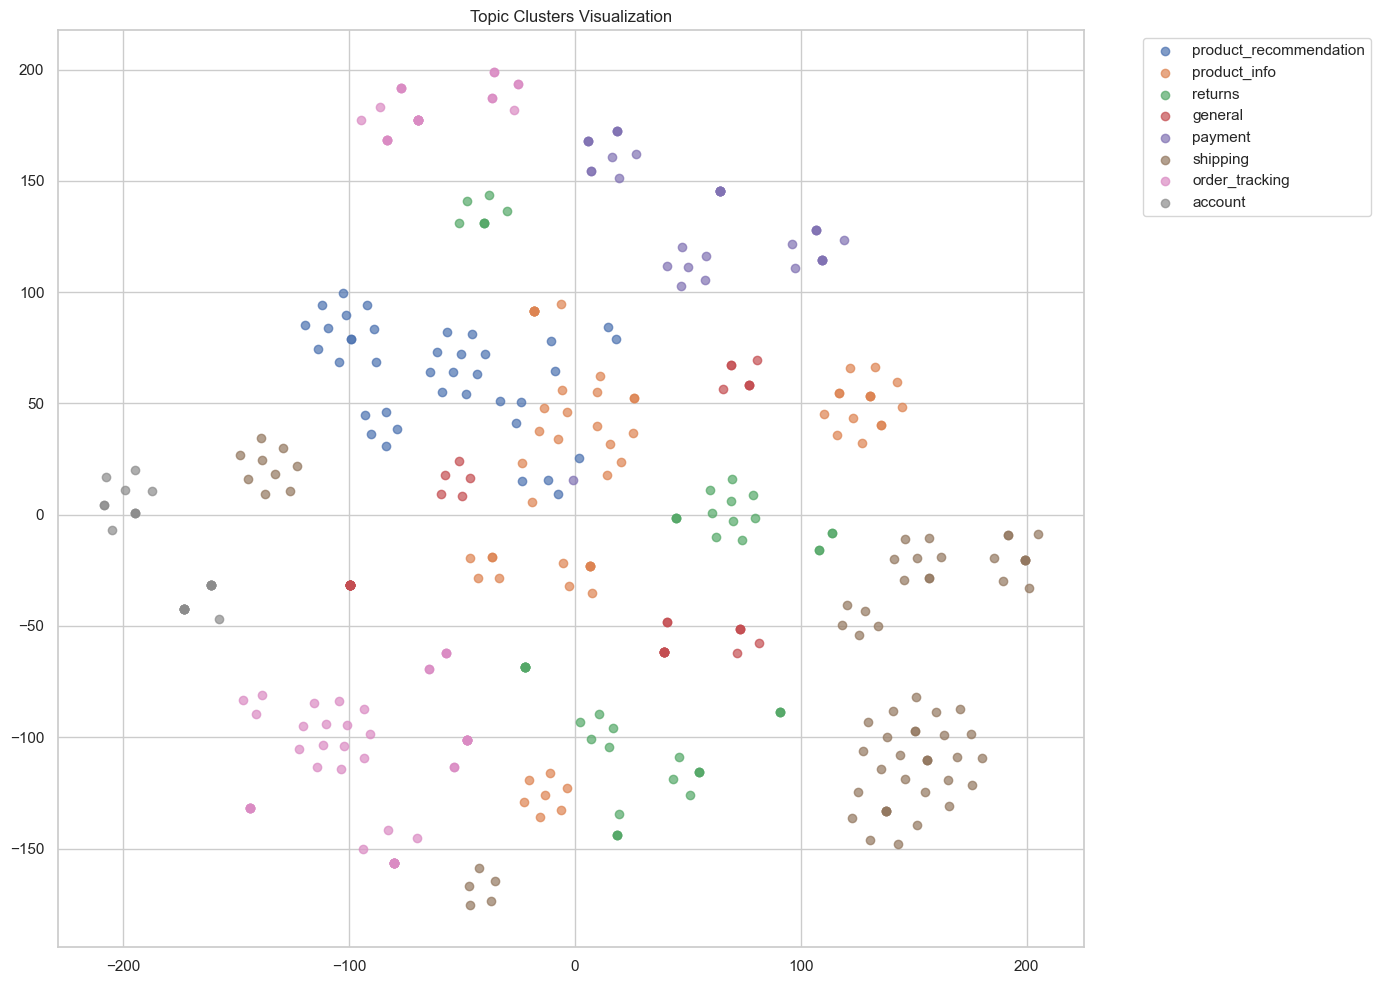

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_analyzed['question_clean'] + ' ' + df_analyzed['answer_clean'])

# Apply dimensionality reduction
# First reduce with PCA to 50 dimensions for efficiency
pca = PCA(n_components=min(50, tfidf_matrix.shape[1] - 1))
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Then apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'x': tsne_features[:, 0],
    'y': tsne_features[:, 1],
    'category': df_analyzed['category']
})

# Plot the clusters
plt.figure(figsize=(14, 10))

# Get unique categories and assign colors
categories = plot_df['category'].unique()

# Create a scatter plot for each category
for i, category in enumerate(categories):
    category_data = plot_df[plot_df['category'] == category]
    plt.scatter(category_data['x'], category_data['y'], label=category, alpha=0.7)

plt.title('Topic Clusters Visualization')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. Prepare Data for LangGraph

Finally, let's prepare the data for use in our LangGraph model.

In [11]:
# Prepare data for LangGraph
print("Preparing data for LangGraph...")
qa_data = analyzer.prepare_for_langchain(df_analyzed)
print(f"Created {len(qa_data)} category groups")

# Display the categories and number of Q&A pairs in each
for category, qa_pairs in qa_data.items():
    print(f"{category}: {len(qa_pairs)} Q&A pairs")

2025-03-13 13:31:05,906 - data_analyzer - INFO - Preparing data for LangChain
2025-03-13 13:31:05,933 - data_analyzer - INFO - Saved LangChain data to data\processed\langchain_data.json


Preparing data for LangGraph...
Created 8 category groups
product_recommendation: 38 Q&A pairs
product_info: 57 Q&A pairs
returns: 47 Q&A pairs
general: 38 Q&A pairs
payment: 34 Q&A pairs
shipping: 69 Q&A pairs
order_tracking: 71 Q&A pairs
account: 24 Q&A pairs


Let's examine a few examples from each category.

In [12]:
# Display examples from each category
for category, qa_pairs in qa_data.items():
    print(f"\n## Category: {category}")
    
    # Display up to 3 examples
    for i, qa in enumerate(qa_pairs[:3]):
        print(f"\nExample {i+1}:")
        print(f"Q: {qa['question']}")
        print(f"A: {qa['answer']}")
        print(f"Metadata: {qa['metadata']}")
    
    if len(qa_pairs) > 3:
        print(f"... and {len(qa_pairs) - 3} more")


## Category: product_recommendation

Example 1:
Q: I need a laptop with good battery life
A: Our DEF Ultrabook offers up to 15 hours of battery life and is perfect for users who need all-day productivity.
Metadata: {'source': 'twitter_customer_support', 'category': 'product_recommendation', 'entities': ['PRODUCT_TYPE:laptop']}

Example 2:
Q: I need a laptop with good battery life
A: Our DEF Ultrabook offers up to 15 hours of battery life and is perfect for users who need all-day productivity.
Metadata: {'source': 'twitter_customer_support', 'category': 'product_recommendation', 'entities': ['PRODUCT_TYPE:laptop']}

Example 3:
Q: I need a laptop with good battery life
A: Our DEF Ultrabook offers up to 15 hours of battery life and is perfect for users who need all-day productivity.
Metadata: {'source': 'twitter_customer_support', 'category': 'product_recommendation', 'entities': ['PRODUCT_TYPE:laptop']}
... and 35 more

## Category: product_info

Example 1:
Q: Which laptop is better for

## 6. Laptop Product Analysis

Let's analyze the laptop product data specifically.

In [13]:
# Filter for laptop-related data
laptop_data = df_analyzed[
    (df_analyzed['category'] == 'product_recommendation') | 
    (df_analyzed['category'] == 'product_info')
]

# Further filter for laptop-specific entries
laptop_data = laptop_data[
    laptop_data['question'].str.contains('laptop', case=False) | 
    laptop_data['answer'].str.contains('laptop', case=False)
]

print(f"Found {len(laptop_data)} laptop-related Q&A pairs")
display(laptop_data.head())

Found 41 laptop-related Q&A pairs


,question,answer,category,source,timestamp,question_clean,answer_clean,question_length,answer_length,entities
0,I need a laptop with good battery life,Our DEF Ultrabook offers up to 15 hours of bat...,product_recommendation,twitter_customer_support,2025-03-13 13:31:03,need laptop with good battery life,def ultrabook offers up hours battery life per...,8,20,[PRODUCT_TYPE:laptop]
1,Which laptop is better for video editing?,"For video editing, I'd recommend our GHI Pro w...",product_info,twitter_customer_support,2025-03-13 13:31:03,laptop better video editing,video editing id recommend ghi pro with core p...,7,18,[PRODUCT_TYPE:laptop]
17,I need a laptop with good battery life,Our DEF Ultrabook offers up to 15 hours of bat...,product_recommendation,twitter_customer_support,2025-03-13 13:31:03,need laptop with good battery life,def ultrabook offers up hours battery life per...,8,20,[PRODUCT_TYPE:laptop]
24,Which laptop is better for video editing?,"For video editing, I'd recommend our GHI Pro w...",product_info,twitter_customer_support,2025-03-13 13:31:03,laptop better video editing,video editing id recommend ghi pro with core p...,7,18,[PRODUCT_TYPE:laptop]
26,I need a laptop with good battery life,Our DEF Ultrabook offers up to 15 hours of bat...,product_recommendation,twitter_customer_support,2025-03-13 13:31:03,need laptop with good battery life,def ultrabook offers up hours battery life per...,8,20,[PRODUCT_TYPE:laptop]


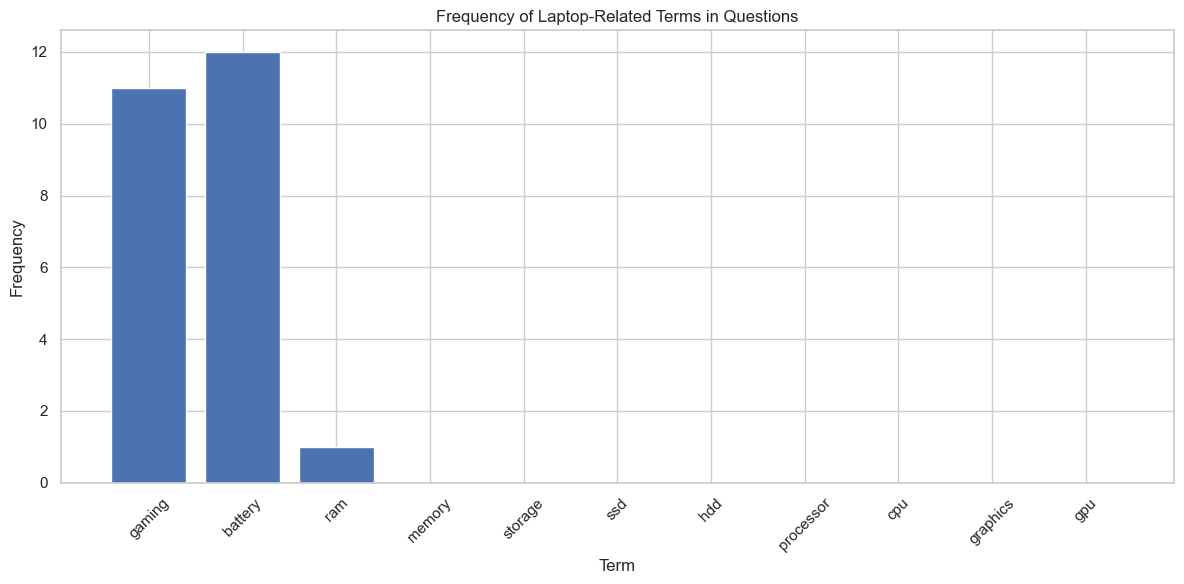

In [14]:
# Analyze laptop questions
laptop_questions = laptop_data['question'].tolist()

# Common laptop-related terms
laptop_terms = ['gaming', 'battery', 'ram', 'memory', 'storage', 'ssd', 'hdd', 'processor', 'cpu', 'graphics', 'gpu']

# Count occurrences of each term
term_counts = {}
for term in laptop_terms:
    count = sum(1 for q in laptop_questions if term in q.lower())
    term_counts[term] = count

# Plot term frequencies
plt.figure(figsize=(12, 6))
plt.bar(term_counts.keys(), term_counts.values())
plt.title('Frequency of Laptop-Related Terms in Questions')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Sentiment Analysis

Let's perform sentiment analysis on the questions to understand user emotions.

In [15]:
try:
    from transformers import pipeline
    
    # Initialize sentiment analysis pipeline
    sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    
    # Analyze a sample of questions
    sample_size = min(100, len(df_analyzed))
    sample_questions = df_analyzed['question'].sample(sample_size).tolist()
    
    # Get sentiment predictions
    sentiments = sentiment_analyzer(sample_questions)
    
    # Count sentiments
    sentiment_counts = {}
    for sentiment in sentiments:
        label = sentiment['label']
        sentiment_counts[label] = sentiment_counts.get(label, 0) + 1
    
    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values())
    plt.title('Sentiment Distribution in Questions')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error performing sentiment analysis: {e}")
    print("You may need to install the transformers library: pip install transformers torch")

Error performing sentiment analysis: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
You may need to install the transformers library: pip install transformers torch


## 8. Language Detection

Let's detect the language of each question to understand the distribution.

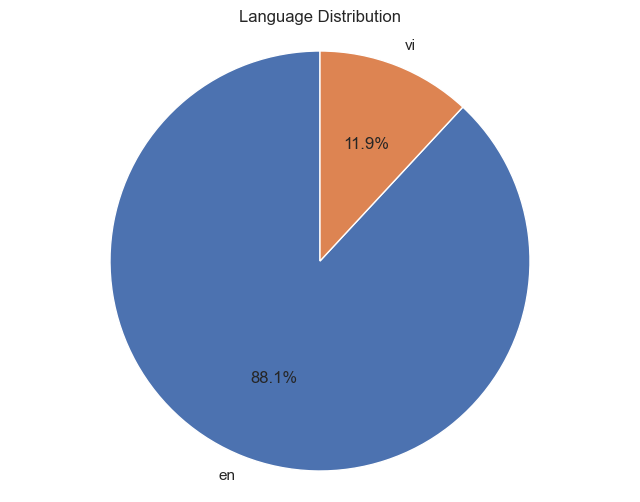

In [16]:
# Simple language detection function
def detect_language(text):
    if not isinstance(text, str):
        return "unknown"
    
    # Vietnamese characters
    vietnamese_chars = set('àáảãạăắằẳẵặâấầẩẫậèéẻẽẹêếềểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵđ')
    text_lower = text.lower()
    
    for char in vietnamese_chars:
        if char in text_lower:
            return "vi"
    return "en"

# Detect language for all questions
df_analyzed['detected_language'] = df_analyzed['question'].apply(detect_language)

# Count languages
language_counts = df_analyzed['detected_language'].value_counts()

# Plot language distribution
plt.figure(figsize=(8, 6))
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Language Distribution')
plt.show()

## 9. Save the Analyzed Data

Finally, let's save the analyzed data for future use.

In [17]:
# Save the analyzed data
output_path = os.path.join(DATA_DIR, "analyzed_data_notebook.csv")
df_analyzed.to_csv(output_path, index=False)
print(f"Saved analyzed data to {output_path}")

Saved analyzed data to data\analyzed_data_notebook.csv


## Conclusion

In this notebook, we've demonstrated how to:

1. Collect customer support data from various sources
2. Analyze and clean the data
3. Visualize the data distribution
4. Create topic clusters
5. Prepare the data for use in our LangGraph model
6. Analyze laptop-specific data
7. Perform sentiment analysis
8. Detect languages

This data can now be used to train and improve our customer support chatbot.